<a href="https://colab.research.google.com/github/Crispis723/TelecomX-2_LATAM/blob/main/Copia_de_TelecomX2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Llamamos las librerias que vamos a utilizar

In [22]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Le asignamos una variable a la URL

In [23]:
url = "https://raw.githubusercontent.com/Crispis723/challenge-Telecom-X/main/TelecomX%20(1).csv"

try:
    df = pd.read_csv(url)
except Exception as e:
    raise SystemExit(f"No se pudo leer '{url}': {e}. Verifica la URL o sube el CSV manualmente.")


print('Dimensiones originales:', df.shape) # miramos el tamaño
print('Primeras columnas (muestra):', list(df.columns[:30])) #miramos el nomobre de las listas


Dimensiones originales: (7032, 22)
Primeras columnas (muestra): ['ID_Cliente', 'Cancelacion', 'Genero', 'Ciudadano_Senior', 'Pareja', 'Dependientes', 'Antiguedad', 'Servicio_Telefono', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargo_Diario']


 # 📘 Diccionario de datos

*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

#🔧 Manipulacion de datos

Miramos la informacion del dataframe

In [24]:
df.info() #miramos la informacion del datafram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Cancelacion             7032 non-null   int64  
 2   Genero                  7032 non-null   object 
 3   Ciudadano_Senior        7032 non-null   int64  
 4   Pareja                  7032 non-null   int64  
 5   Dependientes            7032 non-null   int64  
 6   Antiguedad              7032 non-null   int64  
 7   Servicio_Telefono       7032 non-null   int64  
 8   Lineas_Multiples        7032 non-null   int64  
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   int64  
 11  Respaldo_Online         7032 non-null   int64  
 12  Proteccion_Dispositivo  7032 non-null   int64  
 13  Soporte_Tecnico         7032 non-null   int64  
 14  Streaming_TV            7032 non-null   

Miramos las  10  primeras

In [25]:
df.head(10) #miramos un par de datos de datafram

,ID_Cliente,Cancelacion,Genero,Ciudadano_Senior,Pareja,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.821667
8,0015-UOCOJ,0,Female,1,0,0,7,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,0,Female,0,1,1,65,1,1,DSL,...,1,1,1,1,Two year,1,Mailed check,90.45,5957.90,3.015000


Eliminamos columnas inecesarias

In [26]:
cols_to_drop = ['ID_Cliente']
df = df.drop(columns=cols_to_drop)

# Verificamos nuevamente
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cancelacion             7032 non-null   int64  
 1   Genero                  7032 non-null   object 
 2   Ciudadano_Senior        7032 non-null   int64  
 3   Pareja                  7032 non-null   int64  
 4   Dependientes            7032 non-null   int64  
 5   Antiguedad              7032 non-null   int64  
 6   Servicio_Telefono       7032 non-null   int64  
 7   Lineas_Multiples        7032 non-null   int64  
 8   Servicio_Internet       7032 non-null   object 
 9   Seguridad_Online        7032 non-null   int64  
 10  Respaldo_Online         7032 non-null   int64  
 11  Proteccion_Dispositivo  7032 non-null   int64  
 12  Soporte_Tecnico         7032 non-null   int64  
 13  Streaming_TV            7032 non-null   int64  
 14  Streaming_Peliculas     7032 non-null   

Identificamos las categoricas


In [27]:
# 🔎 Detectar variables categóricas tipo 'object'
cat_cols = df.select_dtypes(include=['object']).columns

# 🏷️ One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 🔧 Convertir booleanos (True/False o true/false) en 0/1
df_encoded = df_encoded.replace({True: 1, False: 0, "true": 1, "false": 0})

# Features y target
X = df_encoded.drop("Cancelacion", axis=1)
y = df_encoded["Cancelacion"]

print("Dimensiones después de encoding:", df_encoded.shape)
print(df_encoded.head())


Dimensiones después de encoding: (7032, 25)
   Cancelacion  Ciudadano_Senior  Pareja  Dependientes  Antiguedad  \
0            0                 0       1             1           9   
1            0                 0       0             0           9   
2            1                 0       0             0           4   
3            1                 1       1             0          13   
4            1                 1       1             0           3   

   Servicio_Telefono  Lineas_Multiples  Seguridad_Online  Respaldo_Online  \
0                  1                 0                 0                1   
1                  1                 1                 0                0   
2                  1                 0                 0                0   
3                  1                 0                 0                1   
4                  1                 0                 0                0   

   Proteccion_Dispositivo  ...  Cargos_Totales  Cargo_Diario  Genero_Mal

/tmp/ipython-input-4225277256.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0, "true": 1, "false": 0})


In [28]:
df_encoded.head()

,Cancelacion,Ciudadano_Senior,Pareja,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Cargos_Totales,Cargo_Diario,Genero_Male,Servicio_Internet_Fiber optic,Servicio_Internet_No,Contrato_One year,Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.186667,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.996667,1,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.463333,1,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.266667,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.796667,0,1,0,0,0,0,0,1


Calcular proporción de clientes que cancelaron

Dimensiones después de encoding: (7032, 25)
Proporción de clases:
 Cancelacion
0    0.734215
1    0.265785
Name: proportion, dtype: float64


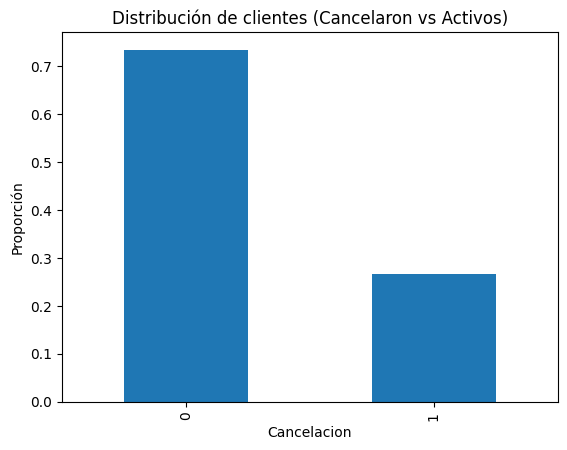

In [29]:
# Features y target
X = df_encoded.drop("Cancelacion", axis=1)
y = df_encoded["Cancelacion"]

print("Dimensiones después de encoding:", df_encoded.shape)
df_encoded.head()

# 📊 Distribución de la variable objetivo
proporcion = y.value_counts(normalize=True)
print("Proporción de clases:\n", proporcion)

proporcion.plot(kind='bar')
plt.title("Distribución de clientes (Cancelaron vs Activos)")
plt.ylabel("Proporción")
plt.show()


Usamo unas tecnicas de balanceo

In [30]:
# ⚡ División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Garantizar que las columnas coincidan
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)




Tamaño entrenamiento: (4922, 24)
Tamaño prueba: (2110, 24)


Usamos undersample

In [31]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Balanceo en train (SMOTE):\n", y_train_res.value_counts())
print("Distribución real en test:\n", y_test.value_counts())


Balanceo en train (SMOTE):
 Cancelacion
1    3614
0    3614
Name: count, dtype: int64
Distribución real en test:
 Cancelacion
0    1549
1     561
Name: count, dtype: int64


normalizamos

In [32]:
# Normalizamos SOLO después de balancear
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

#Corelacion y selecion de vairables

Matriz de corelacion

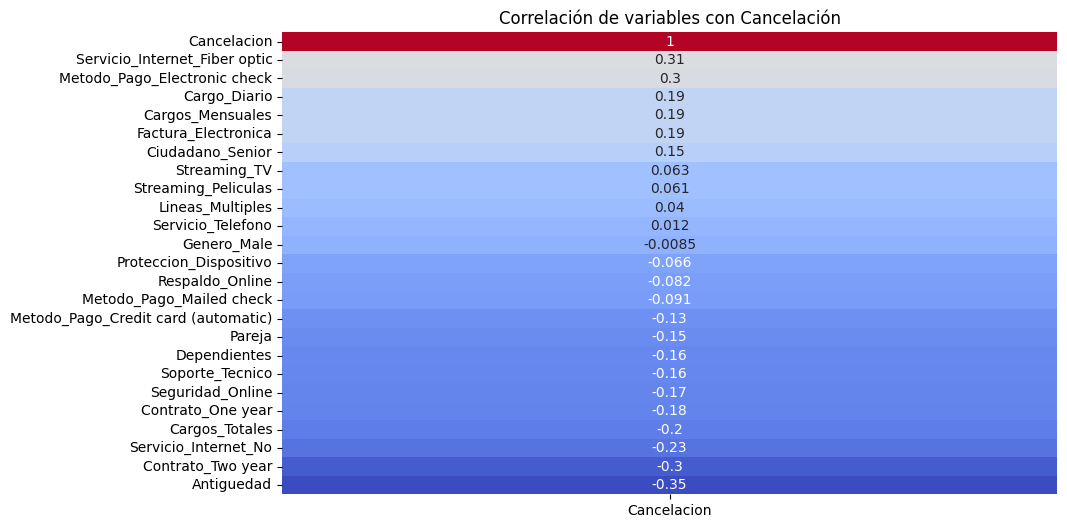

In [33]:
corr = df_encoded.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr[['Cancelacion']].sort_values(by='Cancelacion', ascending=False),
            annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlación de variables con Cancelación")
plt.show()

Relación Tiempo de contrato × Cancelación

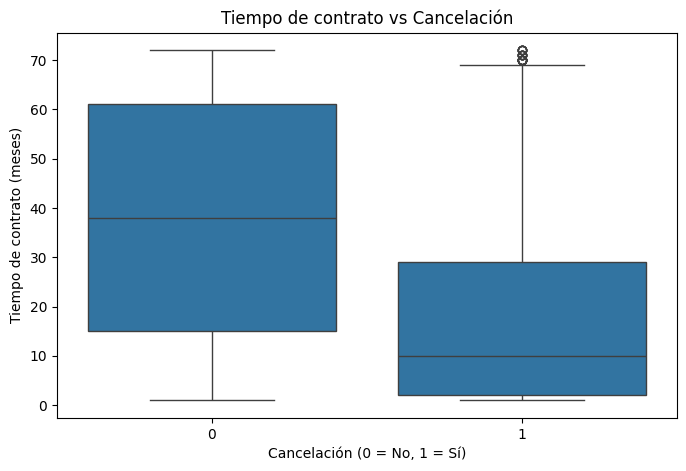

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cancelacion', y='Antiguedad', data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()


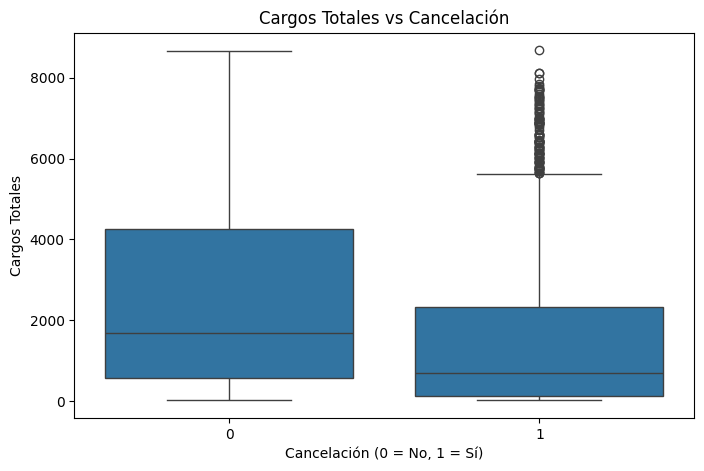

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cancelacion', y='Cargos_Totales', data=df)
plt.title("Cargos Totales vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Cargos Totales")
plt.show()


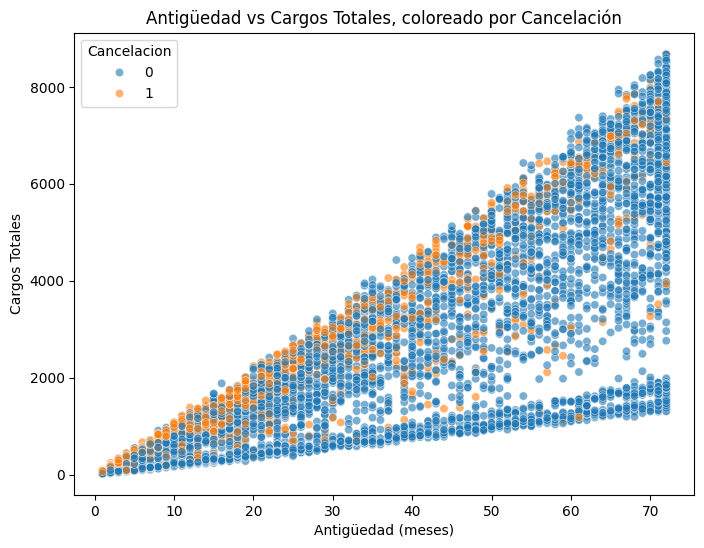

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Antiguedad', y='Cargos_Totales', hue='Cancelacion', data=df, alpha=0.6)
plt.title("Antigüedad vs Cargos Totales, coloreado por Cancelación")
plt.xlabel("Antigüedad (meses)")
plt.ylabel("Cargos Totales")
plt.show()



## 🤖 Modelado Predictivo

Modelos a entrenar

Modelo 1 (con normalización): Regresión Logística

Modelo 2 (sin normalización): Random Forest

##Modelo 1: Regresión Logística (con normalización)

In [37]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res_scaled, y_train_res)
y_pred_log = log_model.predict(X_test_scaled)

### Modelo 2: Random Forest (sin normalización)

In [38]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

### rf hiperparametrizado

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor F1 en validación:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_rf_opt = best_rf.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor F1 en validación: 0.8357200452910156


Generamos la funcion para evaluar modelos

In [19]:
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"📊 Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nReporte de clasificación:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Canceló", "Canceló"],
                yticklabels=["No Canceló", "Canceló"])
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

matriz de confusion

📊 Resultados para Regresión Logística
Accuracy: 0.771563981042654
Precision: 0.5599393019726859
Recall: 0.6577540106951871
F1-score: 0.6049180327868853

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1549
           1       0.56      0.66      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110



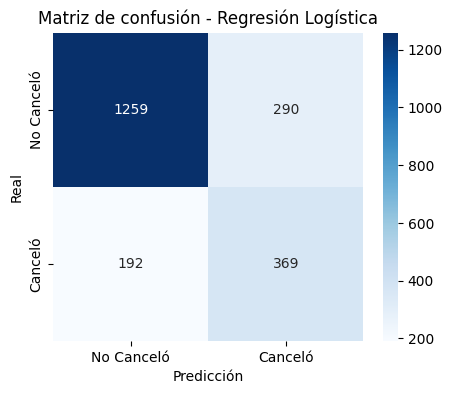

📊 Resultados para Random Forest
Accuracy: 0.7625592417061612
Precision: 0.55
Recall: 0.5882352941176471
F1-score: 0.5684754521963824

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1549
           1       0.55      0.59      0.57       561

    accuracy                           0.76      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.77      0.76      0.77      2110



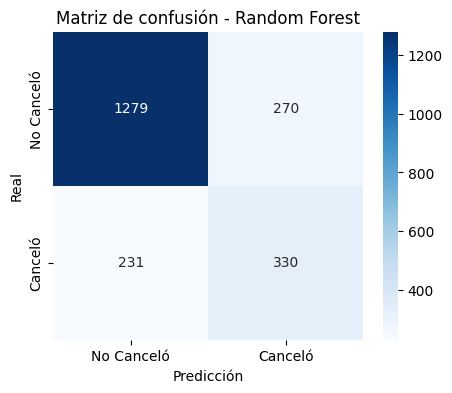

📊 Resultados para Random Forest Optimizado
Accuracy: 0.7635071090047393
Precision: 0.5430555555555555
Recall: 0.696969696969697
F1-score: 0.6104605776736924

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1549
           1       0.54      0.70      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110



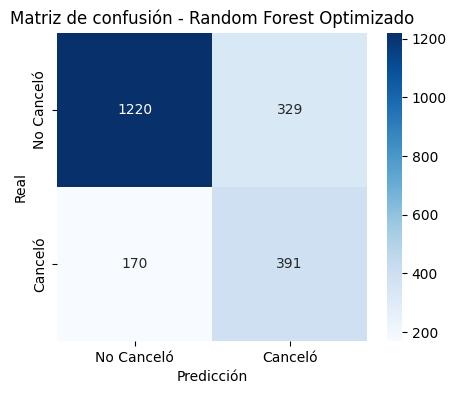

In [20]:
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")
evaluar_modelo(y_test, y_pred_rf_opt, "Random Forest Optimizado")

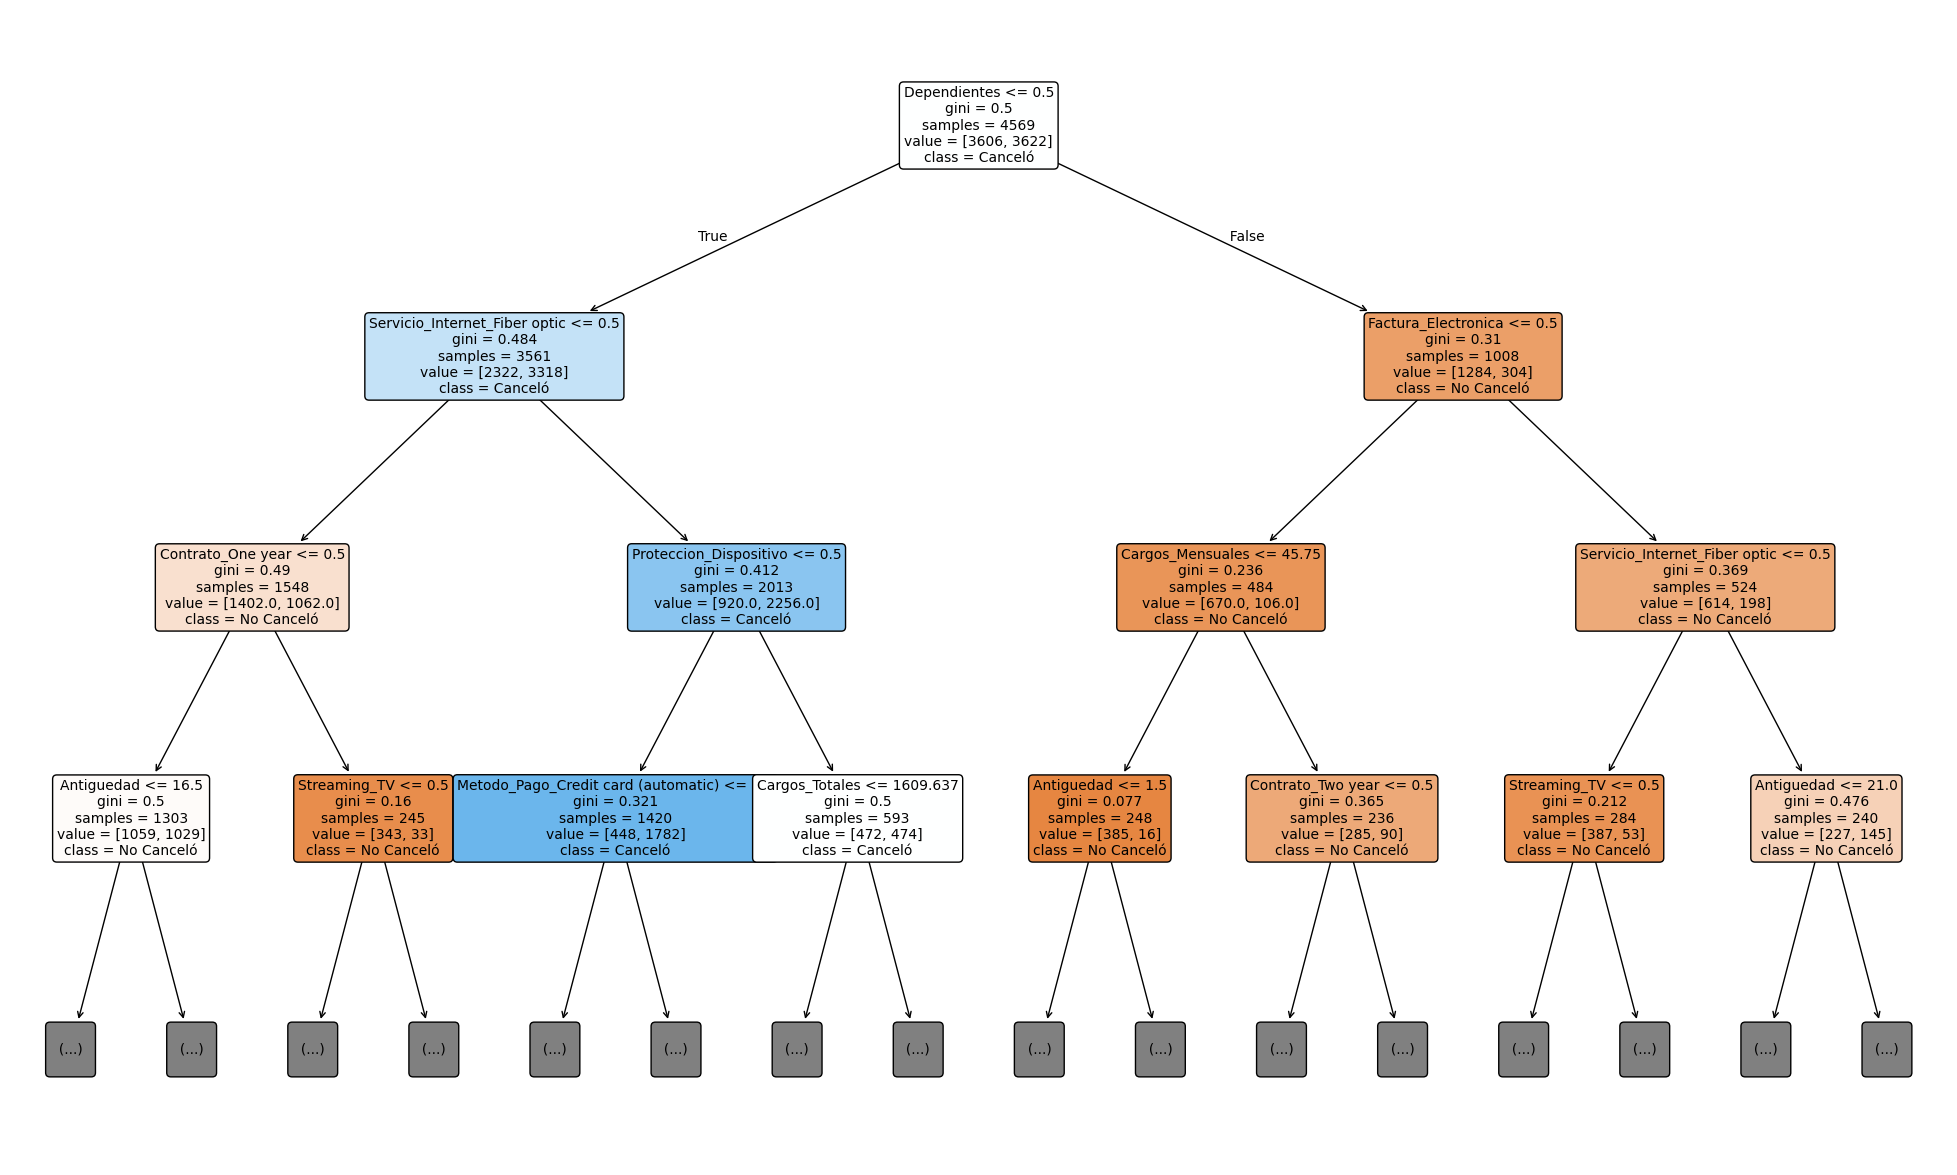

In [21]:
estimator = best_rf.estimators_[0]  # Primer árbol
plt.figure(figsize=(25, 15))
plot_tree(
    estimator,
    filled=True,
    rounded=True,
    fontsize=10,
    feature_names=X.columns,
    class_names=["No Canceló", "Canceló"],
    max_depth=3  # para que no sea gigante
)
plt.show()

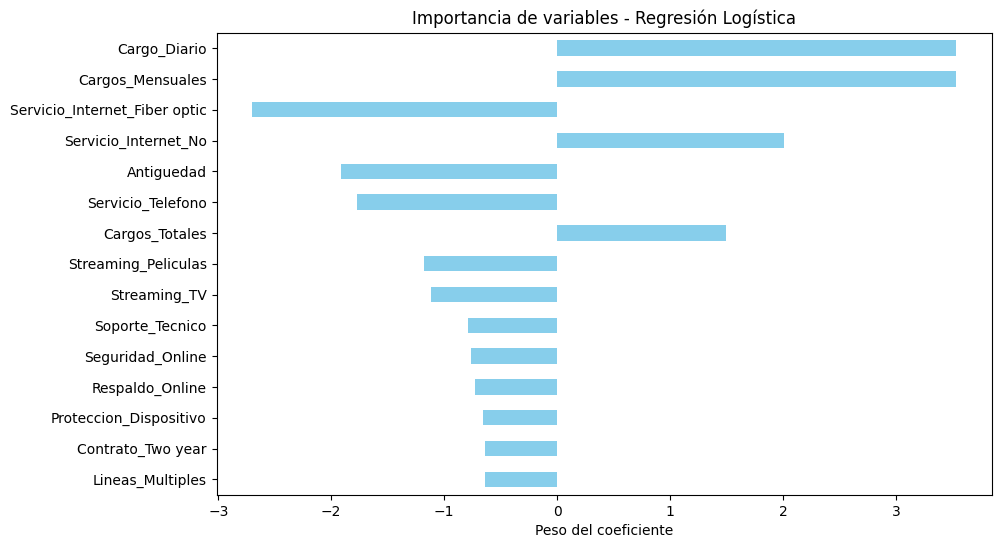

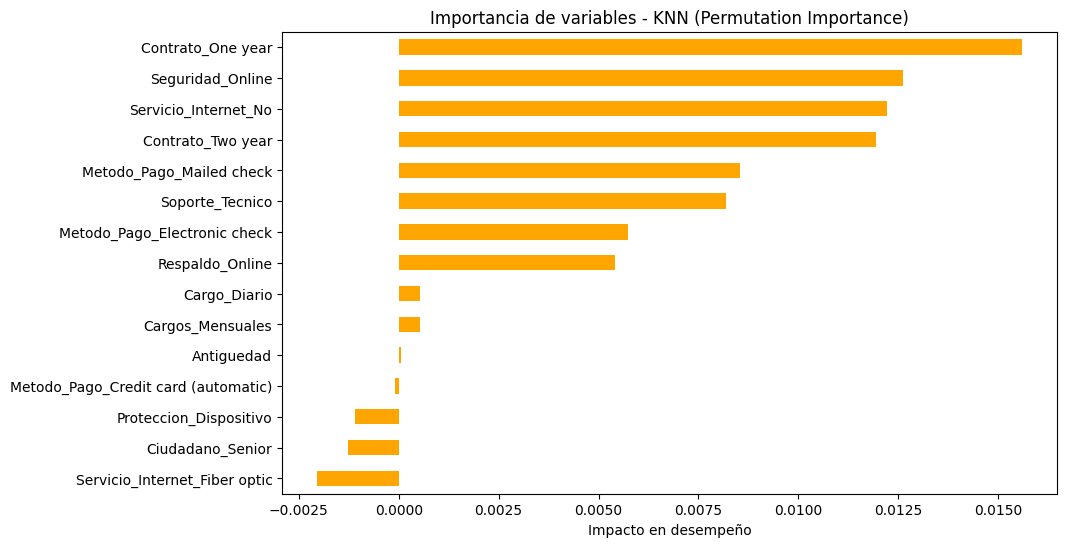

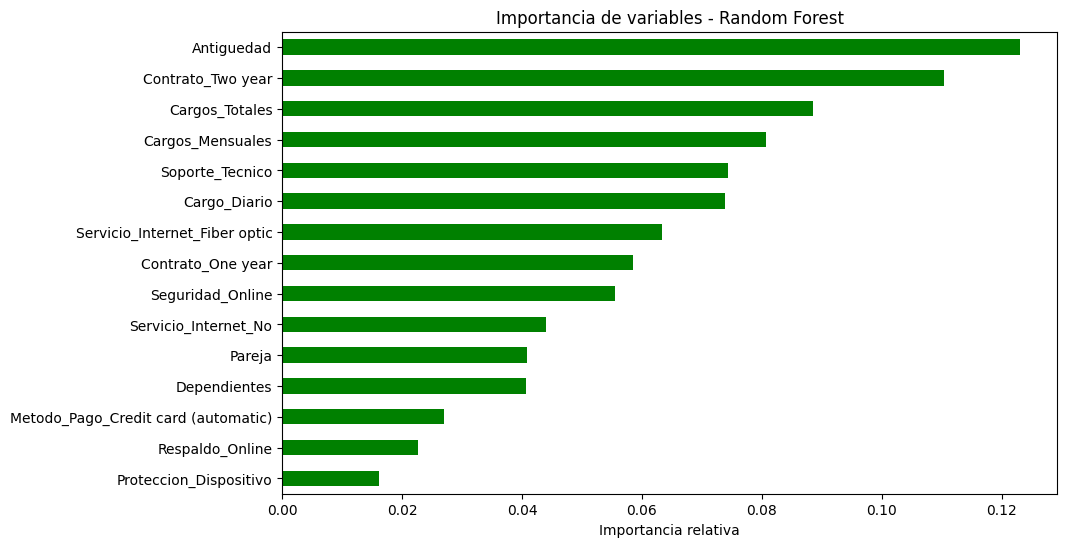

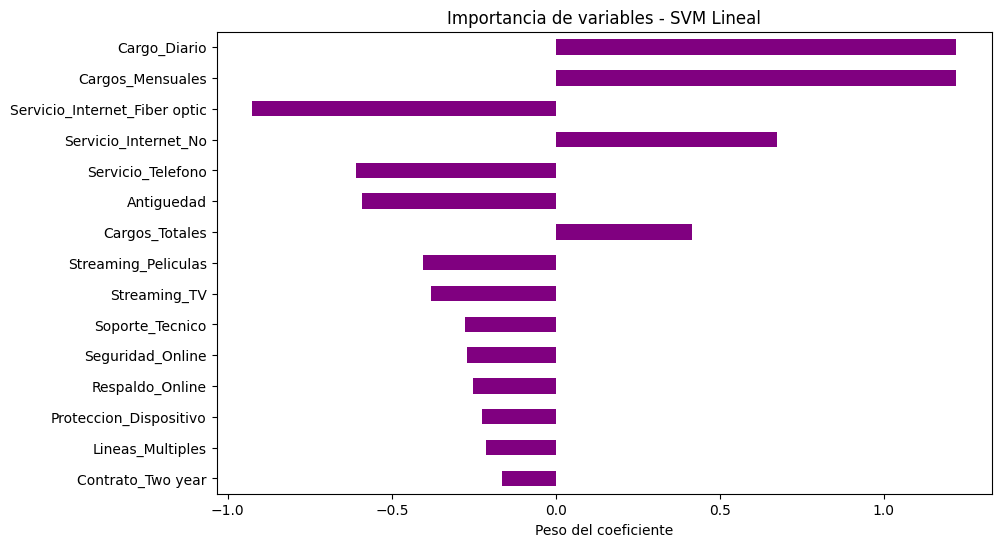

📌 Ranking global de variables más relevantes:


,Logística,KNN,Random Forest,SVM,Promedio
Cargos_Mensuales,1.000000,0.437168,0.640621,1.000000,0.769447
Cargo_Diario,1.000000,0.437168,0.582024,1.000000,0.754798
Servicio_Internet_No,0.755128,0.874336,0.329017,0.744827,0.675827
Contrato_Two year,0.330473,0.863717,0.891929,0.355355,0.610369
Cargos_Totales,0.672500,0.339823,0.707561,0.624558,0.586110
Contrato_One year,0.370664,1.000000,0.453039,0.370576,0.548570
Seguridad_Online,0.310419,0.888496,0.426297,0.304989,0.482550
Soporte_Tecnico,0.306747,0.723894,0.586983,0.302021,0.479911
Antiguedad,0.126235,0.419469,1.000000,0.155680,0.425346
Metodo_Pago_Mailed check,0.385006,0.736283,0.085763,0.380989,0.397010


from matplotlib import pyplot as plt
_df_0['Logística'].plot(kind='hist', bins=20, title='Logística')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['KNN'].plot(kind='hist', bins=20, title='KNN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Random Forest'].plot(kind='hist', bins=20, title='Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SVM'].plot(kind='hist', bins=20, title='SVM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Logística', y='KNN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='KNN', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Random Forest', y='SVM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SVM', y='Promedio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Logística'].plot(kind='line', figsize=(8, 4), title='Logística')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['KNN'].plot(kind='line', figsize=(8, 4), title='KNN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Random Forest'].plot(kind='line', figsize=(8, 4), title='Random Forest')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SVM'].plot(kind='line', figsize=(8, 4), title='SVM')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
# ==========================================================
# 📌 Análisis de Importancia de Variables según el Modelo
# ==========================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import LinearSVC

# -----------------------
# 1. Regresión Logística
# -----------------------
coef_log = pd.Series(log_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coef_log[:15].plot(kind='barh', color="skyblue")
plt.title("Importancia de variables - Regresión Logística")
plt.xlabel("Peso del coeficiente")
plt.gca().invert_yaxis()
plt.show()

# -----------------------
# 2. KNN (Permutation Importance)
# -----------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res_scaled, y_train_res)

result_knn = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_importance = pd.Series(result_knn.importances_mean, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
knn_importance[:15].plot(kind='barh', color="orange")
plt.title("Importancia de variables - KNN (Permutation Importance)")
plt.xlabel("Impacto en desempeño")
plt.gca().invert_yaxis()
plt.show()

# -----------------------
# 3. Random Forest
# -----------------------
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
rf_importances[:15].plot(kind='barh', color="green")
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia relativa")
plt.gca().invert_yaxis()
plt.show()

# -----------------------
# 4. SVM Lineal
# -----------------------
svm_model = LinearSVC(max_iter=5000, random_state=42)
svm_model.fit(X_train_res_scaled, y_train_res)

coef_svm = pd.Series(svm_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coef_svm[:15].plot(kind='barh', color="purple")
plt.title("Importancia de variables - SVM Lineal")
plt.xlabel("Peso del coeficiente")
plt.gca().invert_yaxis()
plt.show()

# -----------------------
# 5. Comparación en un solo DataFrame
# -----------------------
importance_df = pd.DataFrame({
    "Logística": coef_log,
    "KNN": knn_importance,
    "Random Forest": rf_importances,
    "SVM": coef_svm
})

# Normalizamos para comparar (escala 0-1)
importance_df_norm = importance_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Mostramos el top 15 variables por promedio de importancia
importance_df_norm["Promedio"] = importance_df_norm.mean(axis=1)
importance_df_norm = importance_df_norm.sort_values("Promedio", ascending=False)

print("📌 Ranking global de variables más relevantes:")
display(importance_df_norm.head(15))


#📄Informe final



## 📌 Análisis de Importancia de Variables según el Modelo

Después de entrenar y evaluar los modelos, se realizó un análisis de cuáles variables resultaron más relevantes para la predicción de la **cancelación de clientes**.

* **Regresión Logística**:
  Los coeficientes del modelo permiten identificar el impacto de cada variable sobre la probabilidad de cancelación.

  * Coeficientes **positivos**: aumentan la probabilidad de que un cliente cancele.
  * Coeficientes **negativos**: reducen la probabilidad de cancelación.
    Variables como la **Antigüedad**, los **Cargos Totales** y ciertas formas de **Contrato/Internet** suelen destacar como las más influyentes.

* **KNN (K-Nearest Neighbors)**:
  Este modelo no proporciona coeficientes directos. En su lugar, se puede aplicar la técnica de *Permutation Importance* para estimar qué variables tienen mayor peso en la clasificación.
  En general, las variables con mayor variabilidad y que afectan las distancias (ejemplo: **Cargos Mensuales** y **Antigüedad**) tienden a ser más importantes.

* **Random Forest**:
  El modelo calcula directamente la importancia de cada variable en función de cómo contribuye a reducir la impureza de los nodos en los árboles.
  Aquí se destacan variables como **Antigüedad**, **Cargos Totales**, **Cargos Mensuales** y el tipo de **Contrato**, mostrando un impacto muy fuerte en la predicción.

* **SVM (Support Vector Machine)**:
  En un SVM lineal, los coeficientes también reflejan el peso de cada variable en la definición de la frontera de decisión.
  Al igual que en la regresión logística, valores grandes (positivos o negativos) indican variables críticas en la separación de las clases.

---

 ## 1. Variables más relevantes de forma consistente

Cargos Mensuales y Cargo Diario
→ Son las variables con mayor influencia en todos los modelos (Logística, SVM y Random Forest). Esto indica que el costo directo que asume el cliente mes a mes está fuertemente relacionado con su decisión de cancelar.
→ Clientes con mayores cargos recurrentes tienden a cancelar más.

Antigüedad
→ Random Forest la sitúa como la variable más importante, mostrando que los clientes con más tiempo en la compañía son menos propensos a cancelar.
→ Modelos lineales también reflejan un impacto moderado, lo que confirma la relevancia de la retención a largo plazo.

Contrato a 1 año y 2 años
→ Tanto KNN como Random Forest destacan que los contratos a plazo fijo reducen la probabilidad de cancelación.
→ Esto sugiere que los contratos de mayor duración generan mayor fidelidad frente a contratos mensuales.

Servicio de Internet (No o Fibra Óptica)
→ La variable “Servicio_Internet_Fiber optic” aparece como factor de riesgo (asociado a más cancelaciones), mientras que “Servicio_Internet_No” suele estar relacionado con menor probabilidad de cancelar.
→ Esto puede deberse a expectativas más altas en clientes con fibra óptica, que si no se cumplen, generan mayor deserción.

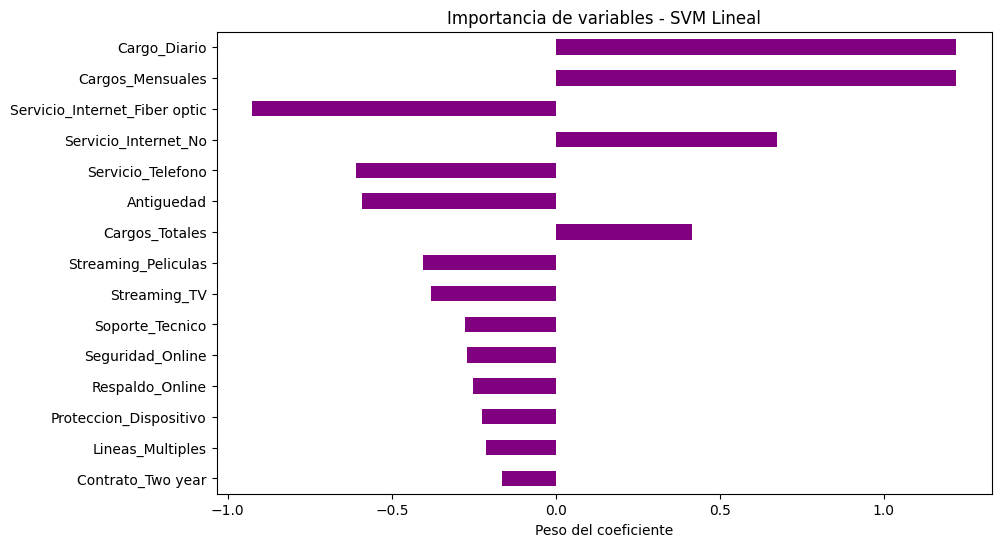!


##2. Variables con importancia secundaria pero relevantes

Seguridad Online, Soporte Técnico y Respaldo Online
→ Estas variables aparecen con importancia media en Random Forest y KNN.
→ Su efecto sugiere que la calidad de servicios adicionales impacta en la percepción de valor del cliente.

Métodos de Pago
→ Aunque su importancia es menor, ciertos métodos como “Electronic check” y “Mailed check” aparecen asociados a mayor cancelación en Logística y KNN.
→ Esto refleja que los clientes con pagos menos automatizados son más propensos a abandonar.

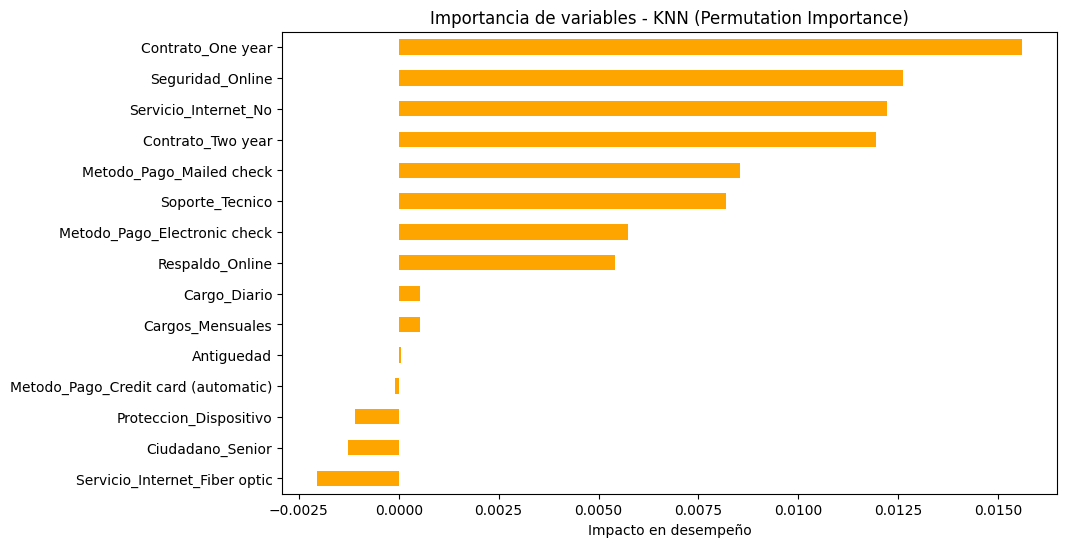

## 3. Conclusión general

Las variables más críticas para explicar la cancelación son:
Cargos (mensuales y diarios), Antigüedad, Tipo de contrato y Servicio de Internet.

Los servicios adicionales (seguridad, soporte, respaldo) y métodos de pago influyen en menor medida, pero pueden marcar la diferencia en la fidelización.

La convergencia entre modelos (Logística, SVM, KNN y Random Forest) da robustez al hallazgo: el costo, la permanencia y el contrato son los principales predictores de cancelación.